In [55]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.model_selection import train_test_split
from math import pi

iris = pd.read_csv('Iris.csv')
iris.drop('Id',axis=1,inplace=True)

In [56]:
def MLestimator(dataset):
    mean = np.mean(dataset,axis=0)
    variance = np.var(dataset,axis=0)
    return(mean,variance)
def variance_squaremat(var):
    return(np.multiply(var,[[1,0],[0,1]]))
def BayesClassifier(test_point,mean,variance):
    mean = np.array([mean])
    X = test_point-mean
    p1 = ((1/(2*pi)**0.5)/(np.linalg.det(variance)))**0.5
    p2 = np.exp(-0.5*np.matmul(np.matmul(X,np.linalg.inv(variance)),np.transpose(X)))
    P = (1/3)*p1*p2     # 1/3 is the prior probability
    return(P)

In [57]:
# separating the dataset based on the type of flower
iris_virginica = iris.loc[iris.Species=='Iris-virginica']
iris_setosa = iris.loc[iris.Species =='Iris-setosa']
iris_versicolor = iris.loc[iris.Species=='Iris-versicolor']
train_virginica, test_virginica = train_test_split(iris_virginica, test_size=0.3)
train_setosa, test_setosa = train_test_split(iris_setosa,test_size=0.3)
train_versicolor, test_versicolor = train_test_split(iris_versicolor,test_size=0.3)

In [58]:
# removing the unrequired columns for ML estimation step
train_virginica.drop(['Species','SepalLengthCm','SepalWidthCm'],axis=1,inplace=True)
train_setosa.drop(['Species','SepalLengthCm','SepalWidthCm'],axis=1,inplace=True)
train_versicolor.drop(['Species','SepalLengthCm','SepalWidthCm'],axis=1,inplace=True)
test_virginica.drop(['SepalLengthCm','SepalWidthCm'],axis=1,inplace=True)
test_setosa.drop(['SepalLengthCm','SepalWidthCm'],axis=1,inplace=True)
test_versicolor.drop(['SepalLengthCm','SepalWidthCm'],axis=1,inplace=True)
test_dataset = pd.concat([test_virginica,test_setosa,test_versicolor])
test_dataset = test_dataset.reset_index(drop=True)
test_virginica.drop(['Species'],axis=1,inplace=True)
test_setosa.drop(['Species'],axis=1,inplace=True)
test_versicolor.drop(['Species'],axis=1,inplace=True)

C:\Users\ASUS\Anaconda3\lib\site-packages\pandas\core\frame.py:4102: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [59]:
# ML estimation over the training dataset to determine the mean and covariance of petal length and width
train_virginica = train_virginica.values
train_setosa = train_setosa.values
train_versicolor = train_versicolor.values
test_virginica = test_virginica.values
test_setosa = test_setosa.values
test_versicolor = test_versicolor.values

In [60]:
mean_virginica,variance_virginica= MLestimator(train_virginica)
mean_setosa,variance_setosa= MLestimator(train_setosa)
mean_versicolor,variance_versicolor= MLestimator(train_versicolor)

In [61]:
# converting to covariance form (square matrix)

variance_virginica = variance_squaremat(variance_virginica)
variance_setosa = variance_squaremat(variance_setosa)
variance_versicolor = variance_squaremat(variance_versicolor)

In [73]:
count = 0
pred=[]
test=[]
n = 45  # no. of iterations
for _ in range(n):
    sample = test_dataset.sample()
    s = sample.drop('Species',axis=1,inplace=False)
    s = s.values

    
    # virginica flower type probability calculation call
    prob_virginica = BayesClassifier(s,mean_virginica,variance_virginica)
    
    # setosa flower type probability calculation call
    prob_setosa = BayesClassifier(s,mean_setosa,variance_setosa)
    
    # versicolor flower type probability calculation call
    prob_versicolor = BayesClassifier(s,mean_versicolor,variance_versicolor)
    
    if(max(prob_virginica,prob_setosa,prob_versicolor)==prob_virginica):
        c = 'Iris-virginica'
    elif(max(prob_virginica,prob_setosa,prob_versicolor)==prob_setosa):
        c = 'Iris-setosa'
    elif(max(prob_virginica,prob_setosa,prob_versicolor)==prob_versicolor):
        c = 'Iris-versicolor'
    s = str(sample.iloc[0,2])
    pred.append(c)
    
    test.append(s)
    
    if(s==c):
        count+=1
        
print("The accuracy of the Bayes classifier which uses ML estimation is: %0.2f %%" %(count*100/n))

The accuracy of the Bayes classifier which uses ML estimation is: 95.56 %


In [49]:
y_test=[]
for i in range(45):
    if test[i]=='Iris-setosa':
        y_test.append(0)
    if test[i]=='Iris-versicolor':
        y_test.append(1)
    if test[i]=='Iris-virginica':
        y_test.append(2)

In [50]:
y_pred=[]
for i in range(45):
    if pred[i]=='Iris-setosa':
        y_pred.append(0)
    if pred[i]=='Iris-versicolor':
        y_pred.append(1)
    if pred[i]=='Iris-virginica':
        y_pred.append(2)

In [51]:
import numpy as np

def compute_confusion_matrix(true, pred):
  '''Computes a confusion matrix using numpy for two np.arrays
  true and pred.

  Results are identical (and similar in computation time) to: 
    "from sklearn.metrics import confusion_matrix"

  However, this function avoids the dependency on sklearn.'''

  K = len(np.unique(true)) # Number of classes 
  result = np.zeros((K, K))

  for i in range(len(true)):
    result[true[i]][pred[i]] += 1

  return result

In [52]:
compute_confusion_matrix(y_test, y_pred)

array([[17.,  0.,  0.],
       [ 0.,  8.,  0.],
       [ 0.,  2., 18.]])

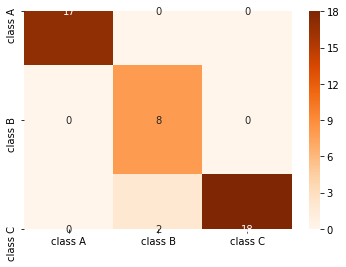

In [54]:
from string import ascii_uppercase
from pandas import DataFrame
import numpy as np
import seaborn as sn




columns = ['class %s' %(i) for i in list(ascii_uppercase)[0:len(np.unique(y_test))]]

confm = compute_confusion_matrix(y_test, y_pred)
df_cm = DataFrame(confm, index=columns, columns=columns)


ax = sn.heatmap(df_cm, cmap='Oranges', annot=True)